In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.gridspec import GridSpec

In [2]:
acc_seen_df = pd.read_csv("./agren_40_long/emb_class_acc.csv")
acc_unseen_df = pd.read_csv("./agren_40_long/unused_accs.csv")
liver_df = pd.read_csv("./agren_40_long/nc_emb_Tl.csv").set_index("label")

In [3]:
liver_high_score_columns = sorted(liver_df.columns[liver_df.max() > 0.01])

In [4]:
renaming = pd.read_csv("./agren_40_long/seen_renaming.csv")

renaming_dict = {
    origional : rename
    for origional, rename in zip(renaming['origional'], renaming['rename'])
}

In [5]:
classifiers = sorted(acc_seen_df.columns.difference(['label', 'classifier_n']))
temp = classifiers[3]
classifiers[3] = classifiers[2]
classifiers[2] = temp

In [6]:
seen_labels = sorted(acc_seen_df['label'].unique())

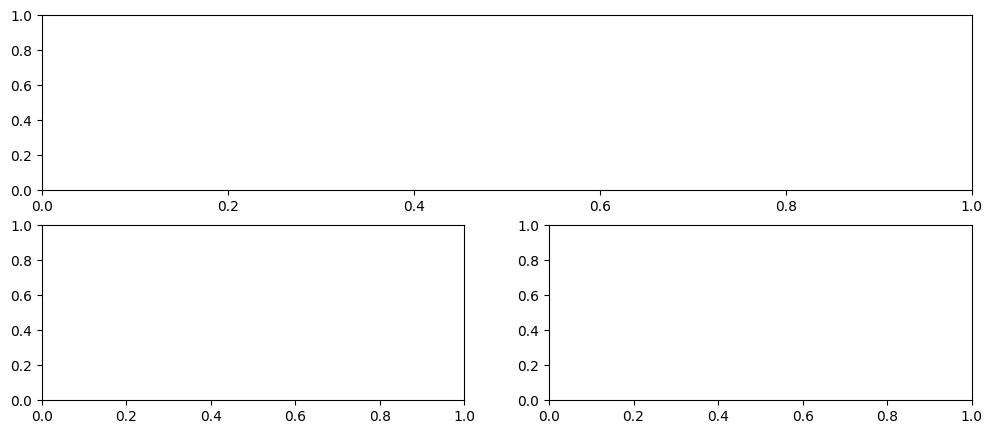

In [10]:
fig = plt.figure(figsize=(12, 5))

gs = GridSpec(2, 2, figure=fig)

ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

classifier_colors = cmaps.WhiteBlue.discrete(7).colors[2:-1]

fontsize=10


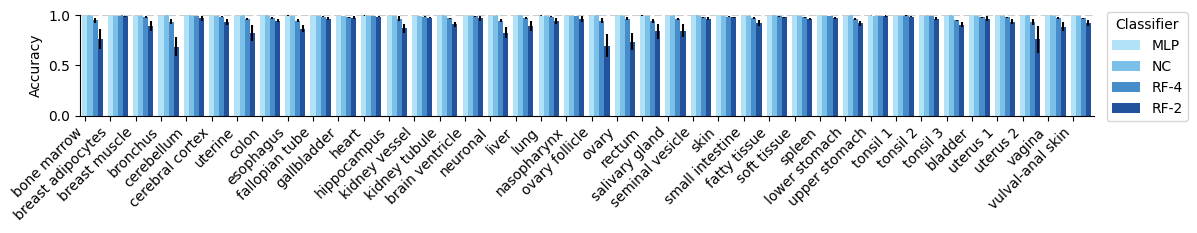

In [27]:

# Top Acc Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 2.5))

x = np.arange(len(seen_labels))
width = 0.2

for i, c in enumerate(classifiers):
    offset = i * width

    accs = acc_seen_df.groupby('label')[c].mean()
    errs = acc_seen_df.groupby('label')[c].std().fillna(0)
    
    ax.bar(x + offset, accs, yerr=errs, width=width, color=classifier_colors[i], label=c)

ax.set_xticks(x, renaming['rename'], rotation=45, ha='right', fontsize=fontsize)
ax.plot([-width, len(seen_labels) - width], [1, 1], color=[0.8, 0.8, 0.8], linestyle='--')
ax.set_xlim([-width, len(seen_labels) - width])
ax.set_ylim([0,1])
ax.set_yticks([0, 0.5, 1])
ax.spines[["top", 'right']].set_visible(False)
ax.legend(bbox_to_anchor=(0.6, 0.6, 0.5, 0.5), title="Classifier")
ax.set_ylabel("Accuracy")

fig.tight_layout()
fig.savefig("./images/seen_classifiers_breakdown.png", dpi=600)


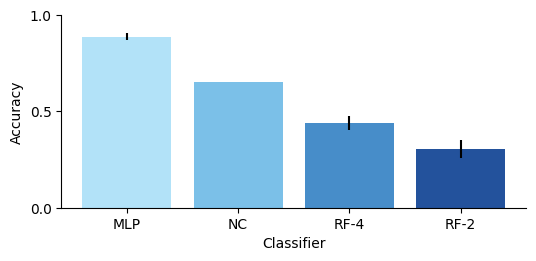

In [28]:

# Unseen accs
fig, ax = plt.subplots(1,1, figsize=(6, 2.5))

label_accs = acc_unseen_df.groupby('label').mean()
label_errss = acc_unseen_df.groupby('label').std().fillna(0)

ax.bar(np.arange(4), label_accs.mean()[classifiers], yerr=label_errss.mean()[classifiers], color=classifier_colors)
ax.set_xticks(np.arange(4), classifiers)
ax.set_yticks([0, 0.5, 1])
ax.spines[["top", "right"]].set_visible(False)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Classifier")

fig.savefig("./images/unseen_classifiers.png", dpi=600)

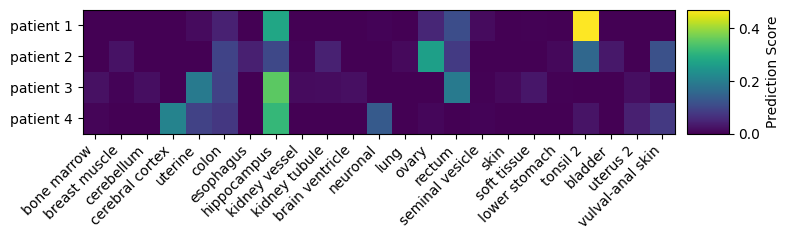

In [29]:

# Heatmap
fig, ax = plt.subplots(1,1, figsize=(8, 2.5))

im = ax.imshow(liver_df[liver_high_score_columns], aspect='auto', interpolation='nearest')

ax3_divider = make_axes_locatable(ax)
cax = ax3_divider.append_axes("right", size="7%", pad="2%")

fig.colorbar(im, label="Prediction Score", aspect=5, anchor=(-0.2, 0.5), cax=cax)
ax.set_yticks(range(4), [f"patient {i + 1}" for i in range(4)], fontsize=fontsize)

x_tick_labels = list(map(renaming_dict.__getitem__, liver_high_score_columns))
ax.set_xticks(np.arange(len(liver_high_score_columns)), x_tick_labels, rotation=45, fontsize=fontsize, ha='right')

fig.tight_layout()
fig.savefig("./images/liver_patients.png", dpi=600)

In [30]:
print("Average Accuracy")
acc_seen_df.mean()

Average Accuracy


/tmp/ipykernel_854/2622043215.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  acc_seen_df.mean()


NC               0.999510
MLP              0.999148
RF-4             0.974176
RF-2             0.907374
classifier_n    39.000000
dtype: float64

In [31]:
acc_unseen_df.mean()

/tmp/ipykernel_854/802321439.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  acc_unseen_df.mean()


NC      0.652480
MLP     0.888295
RF-4    0.439178
RF-2    0.304635
dtype: float64